# Chip Sales Data Analysis

## Problem Statement
**Background**
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

**Objectives** We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours

## Load Dataset 

In [1]:
import pandas as pd 
import numpy as np
import datetime
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns 
import regex as re
import openpyxl
import warnings

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 50
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r'D:/Data Science Project/Virtual Internship/Data Analytics Virtual Internship at Quantium/QVI_purchase_behaviour.csv')
df2 = pd.read_excel(r'D:/Data Science Project/Virtual Internship/Data Analytics Virtual Internship at Quantium/QVI_transaction_data.xlsx', sheet_name='in')

In [3]:
# Create variable so i don't have to load the data from the source every time i made mistake on process the data
purchase = df1.copy()
transaction = df2.copy()

In [4]:
df1 = purchase.copy()
df2 = transaction.copy()

## Data Checks 

In [5]:
def quality_check_data(data):
    display(data.info())
    display(data.describe())
    display(f'Number Of Missing Values : {data.isnull().sum().sum()} Rows')
    display(f'Number Of Duplicated Values : {data.duplicated().sum()} Rows')
    display(f'Number Of Object Data Type : {len(data.select_dtypes(include="object").columns)} Features')
    display(f'Number Of Integer Data Type : {len(data.select_dtypes(include="int64").columns)} Features')
    display(f'Number Of Float Data Type : {len(data.select_dtypes(include="float64").columns)} Features')

In [6]:
quality_check_data(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


'Number Of Missing Values : 0 Rows'

'Number Of Duplicated Values : 0 Rows'

'Number Of Object Data Type : 2 Features'

'Number Of Integer Data Type : 1 Features'

'Number Of Float Data Type : 0 Features'

In [7]:
quality_check_data(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


None

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


'Number Of Missing Values : 0 Rows'

'Number Of Duplicated Values : 1 Rows'

'Number Of Object Data Type : 1 Features'

'Number Of Integer Data Type : 6 Features'

'Number Of Float Data Type : 1 Features'

In [8]:
# function to annotate the label number in visualization
def add_values(ax): 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# function to count values. Just for reducing code length
def count_values(feature, position):
    if position == 'index':
        output = df[feature].value_counts().index
    else :
        output = df[feature].value_counts().values
    return output

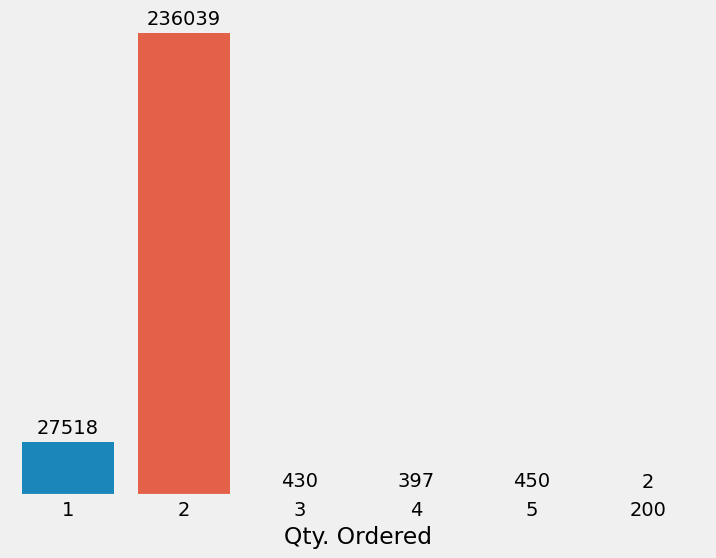

In [9]:
# How Many Customer based on Premium ?
fig, axes = plt.subplots(figsize = (8, 6))

ax1 = sns.barplot(x=df2['PROD_QTY'].value_counts().index, y = df2['PROD_QTY'].value_counts().values)
ax1.grid(axis='y')
add_values(ax1)
plt.ylabel('')
ax1.set_yticklabels([])
plt.xlabel('Qty. Ordered')
plt.savefig('Outliers.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution

plt.show()

**Data Check Results**
1. Both dataset don't have missing values
2. Both dataset have correct format 

## Feature Engineering

In [10]:
# lowercase feature names so make it easire to typed
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [11]:
# revise the date feature into correct date format
date_origin = datetime.date(1899, 12, 30)

def calculate_corresponding_date(days):
    return date_origin + datetime.timedelta(days=days)

df2['date'] = df2['date'].apply(calculate_corresponding_date)

In [12]:
# Create New Features : Brand from Product Name Feature
df2['brand'] = df2['prod_name'].str.split().str[0]

- There is Doritos & Dorito which is a same brand
- There is Infuzions & Infzns which is a same brand 
- There is Smiths & Smith which is a same brand

In [13]:
# unite the mispelled brand name
df2['brand'].replace('Dorito', 'Doritos', inplace = True)
df2['brand'].replace('Infzns', 'Infuzions', inplace = True)
df2['brand'].replace('Smith', 'Smiths', inplace = True)

In [14]:
# Create New Feature : Pack from Prod Name Feature
df2['pack'] = df2['prod_name'].str.extract(r'(\d+)') # regex formula so it could only take digit values 

In [15]:
# remove the rows with product quantity 200 because there was a supplier purchase, not a single customer purchase
df2 = df2[df2['prod_qty'] != 200]

## Merge the Tables

In [16]:
# merge data based on loyalty card number
merged_data = pd.merge(df1, df2, on = 'lylty_card_nbr', how = 'inner')
merged_data.sample(10)

,lylty_card_nbr,lifestage,premium_customer,date,store_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,brand,pack
251151,257098,OLDER FAMILIES,Premium,2018-08-24,257,256325,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,Infuzions,110
33135,37274,RETIREES,Budget,2019-05-17,37,33857,34,Pringles Slt Vingar 134g,5,18.5,Pringles,134
186587,190036,OLDER SINGLES/COUPLES,Budget,2019-03-08,190,190472,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,Kettle,150
2155,3252,YOUNG SINGLES/COUPLES,Mainstream,2019-04-16,3,2207,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,Cobs,110
223188,226295,OLDER FAMILIES,Premium,2019-06-15,226,227812,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,Tyrrells,165
92684,95116,OLDER SINGLES/COUPLES,Budget,2019-03-02,95,94650,23,Cheezels Cheese 330g,2,11.4,Cheezels,330
119939,119056,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-29,119,122399,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,Old,300
223935,227048,OLDER SINGLES/COUPLES,Mainstream,2018-09-04,227,228575,43,Smith Crinkle Cut Bolognese 150g,2,5.2,Smiths,150
123862,123075,NEW FAMILIES,Budget,2018-10-27,123,126414,78,Thins Chips Salt & Vinegar 175g,2,6.6,Thins,175
252517,259048,YOUNG FAMILIES,Mainstream,2019-02-20,259,257715,106,Natural ChipCo Hony Soy Chckn175g,2,6.0,Natural,175


In [17]:
# copy merged data so i it doesnt have to repeat all process i've done before if i made mistak
df = merged_data.copy()

## Exploratory Data Analysis

**Several Questions I Will Answer in Exploratory Data Analysis**
1. How Many Chips & Revenue were gathered ? 
2. How Many Sale were Sale ? 
3. How Many customer group based on premium & lifestage ? 
4. How the composition of customer premium based on lifestage ? 
5. Which is the most success brand ? (Qty & Revenue) 
6. What brand customer liked based on customer lifestage ? 
7. What pack customer liked based on customer lifestage ? 
8. How Total Sales Trend ? 

In [18]:
# How many chips were saled ? 
# Howm any Sales were made ? 
print(df[['prod_qty', 'tot_sales']].describe().T)
print(f"Total Chips Saled    : {df['prod_qty'].sum()} Chips ")
print(f"Total Sales Made     : ${df['tot_sales'].sum()}")

              count      mean       std  min  25%  50%  75%   max
prod_qty   264834.0  1.905813  0.343436  1.0  2.0  2.0  2.0   5.0
tot_sales  264834.0  7.299346  2.527241  1.5  5.4  7.4  9.2  29.5
Total Chips Saled    : 504724 Chips 
Total Sales Made     : $1933114.9999999998


**Insight**
- Total Chips saled reach 505.124 Chips or half 1 million chips !
- Total Chip revenue reach $1.934.414 

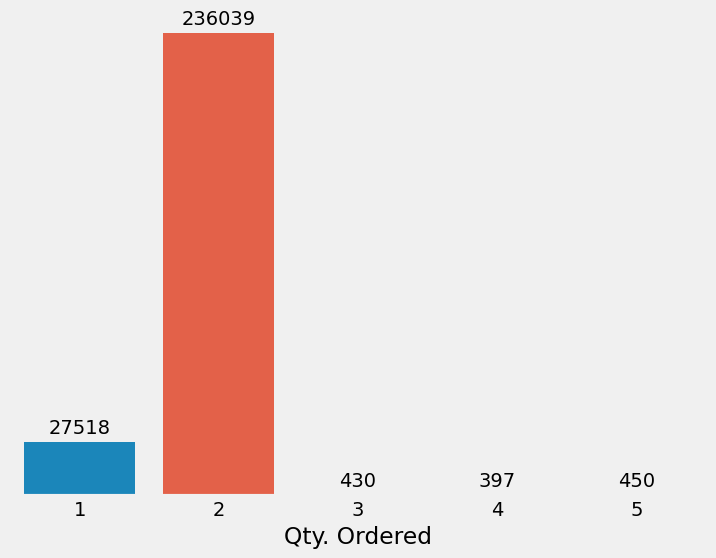

In [19]:
# How Many Customer based on Premium ?
fig, axes = plt.subplots(figsize = (8, 6))

ax1 = sns.barplot(x=df2['prod_qty'].value_counts().index, y = df2['prod_qty'].value_counts().values)
ax1.grid(axis='y')
add_values(ax1)
plt.ylabel('')
ax1.set_yticklabels([])
plt.xlabel('Qty. Ordered')
plt.savefig('Outliers.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution

plt.show()

**Insights**
- Most customer who buy chips was not a member / regular customer. Customer who buy the premium only reach ~30% of total customer who buy chips
- Older singles/couples founded as a most people who buy chips. Young customer founded relatively low compared to elderly for buying chips

In [20]:
# How customer premium compotition based on each customer lifestage ?
agg_lifestage = df.groupby(['lifestage', 'premium_customer']).size().unstack().reset_index()
agg_lifestage['total'] = agg_lifestage.sum(axis=1)

agg_lifestage_percentage = agg_lifestage.copy()
for col in agg_lifestage_percentage.columns[1:-1]:
    agg_lifestage_percentage[col] = agg_lifestage_percentage[col] / agg_lifestage_percentage['total'] * 100

agg_lifestage_percentage = agg_lifestage_percentage.drop('total', axis=1)
agg_lifestage_percentage = agg_lifestage_percentage.reset_index(drop=True)

In [21]:
lifestage = ['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES','OLDER FAMILIES',
                                         'OLDER SINGLES/COUPLES', 'RETIREES',
                                         'YOUNG FAMILIES', 'YOUNG SINGLES / COUPLES']

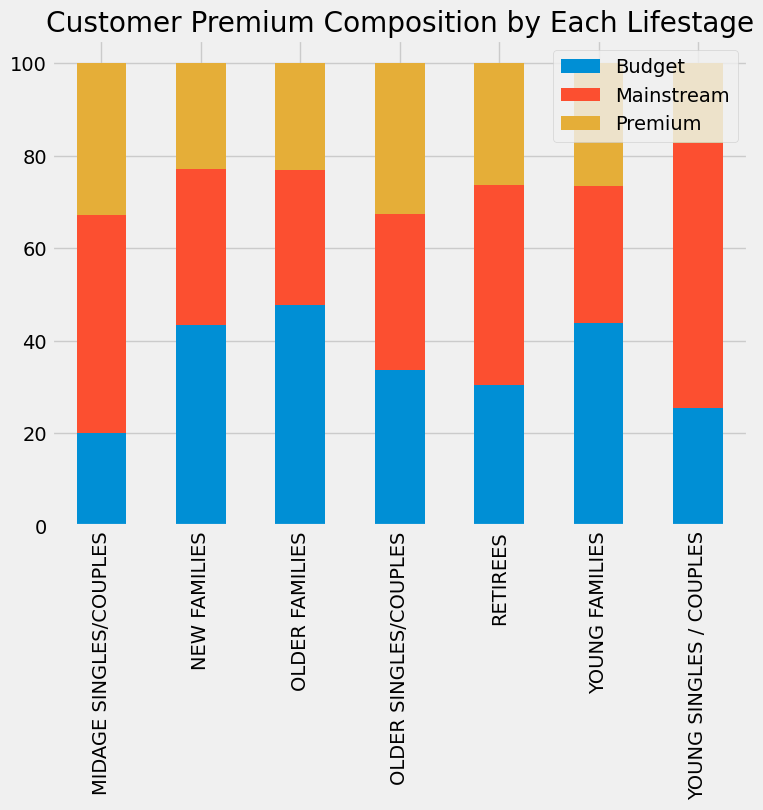

In [22]:
fig, axes = plt.subplots(figsize = (8, 6))

plt.title('Customer Premium Composition by Each Lifestage')

axes1 = agg_lifestage_percentage.plot(kind='bar', stacked=True, ax = axes)
axes1.set_xticklabels(lifestage)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.savefig('Memberhip Composition.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution

    
plt.show()

**Insights**
- Middle Singles / Couples founded have highest composition of becoming a premium member
- Young Singles / Couples founded have lowest proportion of becomeing a premium membe

In [23]:
grouped2 = df.groupby('brand')[['prod_qty', 'tot_sales']].sum().reset_index()

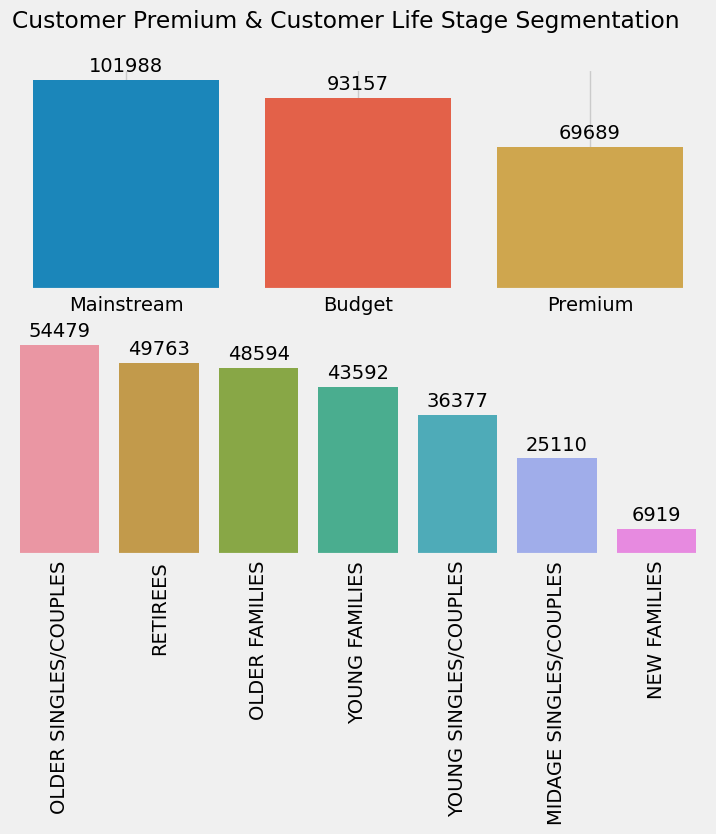

In [24]:
# How Many Customer based on Premium ?
fig, axes = plt.subplots(figsize = (8, 6), nrows = 2, ncols=1)

plt.suptitle('Customer Premium & Customer Life Stage Segmentation')
ax1 = sns.barplot(x = count_values('premium_customer', 'index'), y = count_values('premium_customer', 'values'), ax = axes[0])
ax1.set_ylabel('')
ax1.set_yticklabels([])
ax1.grid(axis='y')
ax1.grid(axis='x')

ax2 = sns.barplot(x = count_values('lifestage', 'index'), y = count_values('lifestage', 'values'))
ax2.set_yticklabels([])
ax2.grid(axis='y')

add_values(ax1)
add_values(ax2)

for label in ax2.get_xticklabels():
    label.set_rotation(90)
plt.savefig('Customer Segmentation.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution
    
plt.show()

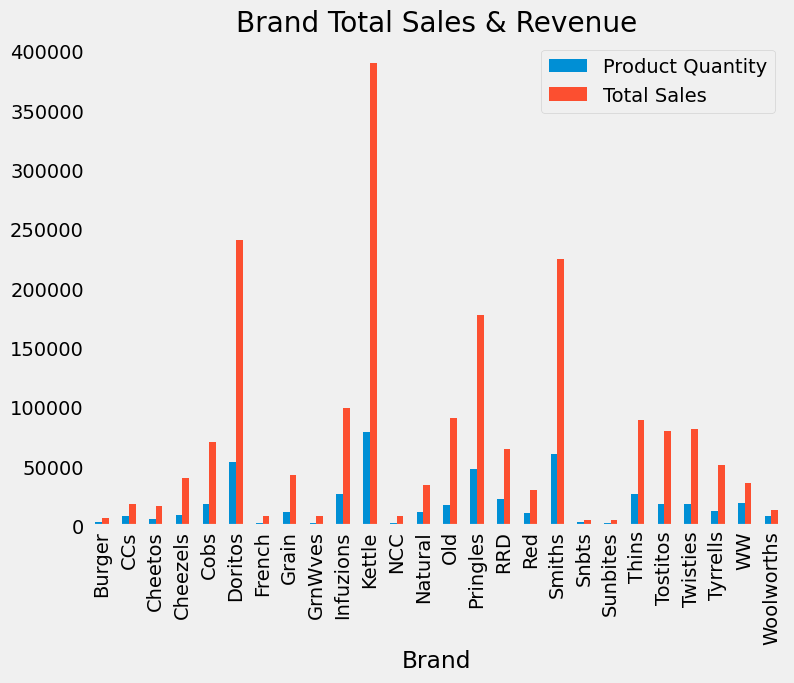

In [25]:
# Which brand has the most success in terms of qty product saled and revenue collected ?
fig, ax = plt.subplots(figsize=(8, 6))

ax1 = grouped2.plot(x='brand', y=['prod_qty', 'tot_sales'], kind='bar', ax=ax)
ax1.grid(axis='y')
ax1.grid(axis='x')

plt.title('Brand Total Sales & Revenue')

plt.xlabel('Brand')
plt.ylabel('')

plt.legend(['Product Quantity', 'Total Sales'])
plt.savefig('Brand Total Sales & Revenue July 2018 - 2019.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution


plt.show()

**Insights**
- Kettle founded as the most success brand in chips sales. They have highest quantity of product saled also have highest revenue collected compared to other chip brand
- Doritos have higher revenue compared to Smiths although Doritos have smaller quantity of product saled to Smiths

In [26]:
# what the most liked brand based on each customer lifestage
agg_brand = df.groupby(['lifestage', 'brand']).size().unstack().reset_index()
agg_brand['total'] = agg_brand.sum(axis=1)

agg_brand_percentage = agg_brand.copy()
for col in agg_brand_percentage.columns[1:-1]:
    agg_brand_percentage[col] = agg_brand_percentage[col] / agg_brand_percentage['total'] * 100

agg_brand_percentage = agg_brand_percentage.drop('total', axis=1)
agg_brand_percentage = agg_brand_percentage.reset_index(drop=True)

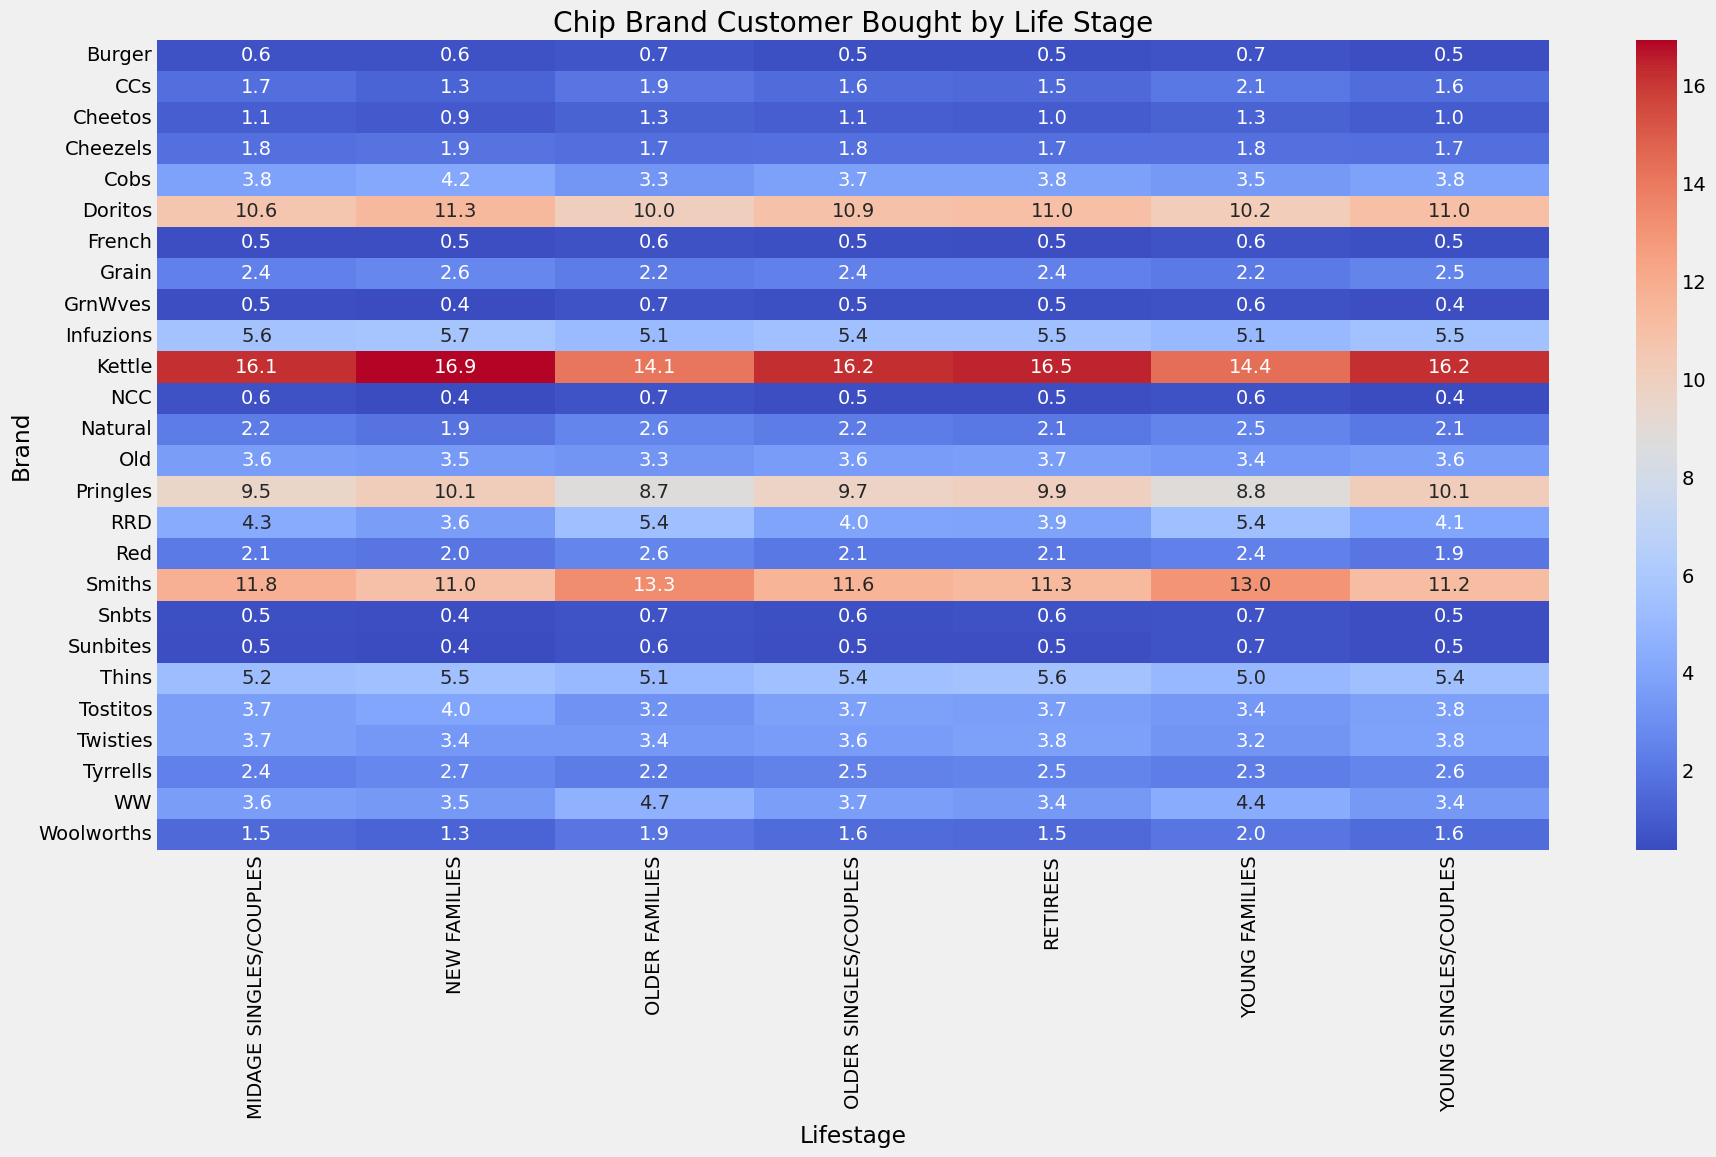

In [27]:
# Create a heatmap for brand percentages by lifestage
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('Chip Brand Customer Bought by Life Stage')

sns.heatmap(agg_brand_percentage.set_index('lifestage').T, cmap='coolwarm', annot=True, fmt='.1f', ax=ax)

plt.xlabel('Lifestage')
plt.ylabel('Brand')

plt.savefig('Chip Brand Customer Bought by Life Stage.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution

plt.show()

**Insights**
- Consistent with other customer lifestage, Kettle become a most liked brand compared to other brands. 
- We can assume that across customer lifestage, they have relatively similar preferred brands 

In [28]:
# what the most liked packaging based on each customer lifestage
agg_pack = df.groupby(['lifestage', 'pack']).size().unstack().reset_index()
agg_pack['total'] = agg_pack.sum(axis=1)

agg_pack_percentage = agg_pack.copy()
for col in agg_pack_percentage.columns[1:-1]:
    agg_pack_percentage[col] = agg_pack_percentage[col] / agg_pack_percentage['total'] * 100

agg_pack_percentage = agg_pack_percentage.drop('total', axis=1)
agg_pack_percentage = agg_pack_percentage.reset_index(drop=True)

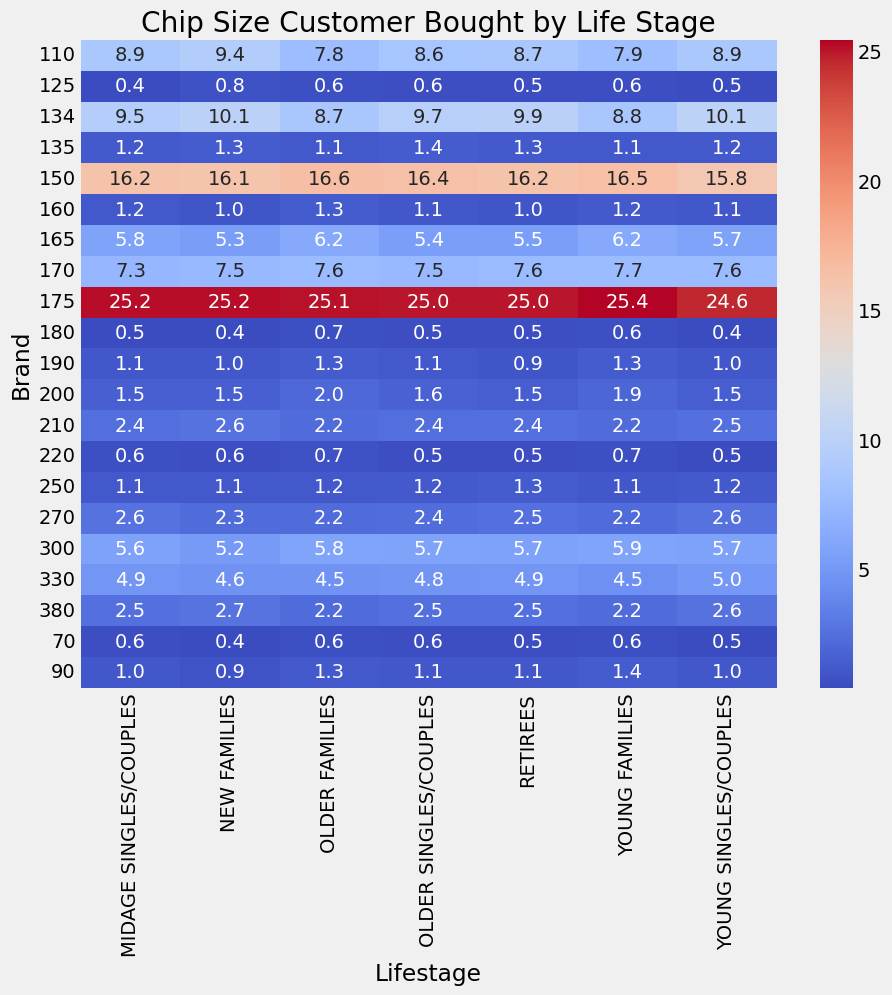

In [29]:
# Create a heatmap for brand percentages by lifestage
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Chip Size Customer Bought by Life Stage')

sns.heatmap(agg_pack_percentage.set_index('lifestage').T, cmap='coolwarm', annot=True, fmt='.1f', ax=ax)

plt.xlabel('Lifestage')
plt.ylabel('Brand')

plt.savefig('Chip Size Customer Bought by Life Stage.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution

plt.show()

**Insights**
- Chips packed in 175g founded most liked chips pack size between customer lifestage
- Similar with previous findings, there is relatively similar preferences for chips packaging size between customer lifestage

In [30]:
agg_prod = df.groupby('date')['prod_qty'].sum()

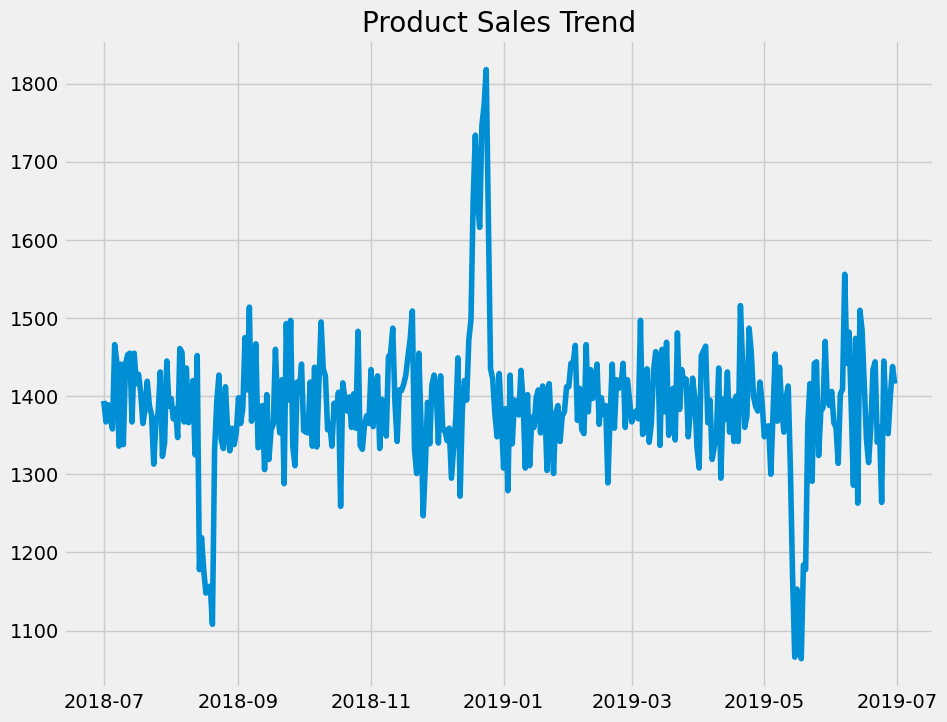

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Product Sales Trend')

plt.plot(agg_prod)

plt.savefig('Product Sales Trend.png', dpi=300, bbox_inches = 'tight')  # Save the plot as a PNG image with 300 dpi resolution


plt.show()

**Insights**
- There is drastically increase of quantity product saled in December 2018 followed by drastically decrease of quantity product sales in January 2018. This event maybe caused by the increasing demand of chips for christmas then the demand normalized in new year of 2019
- There is drastically decrease of quantity product saled in June 2019. We need to inspect why this happen in the future work

## Conclusion & Recommendation

**Conclusion**
- Elderly customer have higher number of buying chips compared to younger customer 
- Young customer has lower number of buying premium membership compared to elder customer 
- Most sucess chips brands in terms of quantity chips saled and revenue collected was Kettle brand
- There is no significant difference of chip brands and chips package size between customer lifestage 

**Recommendation**
- Set marketing srategy targetting on Younger customer. Since younger customer have huge potential and we should exploit them
- Perform Collaboration with Kettle brand to attract existing customer and new customer
- Perform Clustering analysis using unsupervised learning  in the future 